### Run the following chunk of code to import any necessary libraries or packages required to run the rest of the script.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Run the following chunk of code to generate inter- and intra-reproducibility plots.

The user will have to adjust the base_Directory variable for their own directory structure, and pay close attention to the directory structure in the rest of the script.

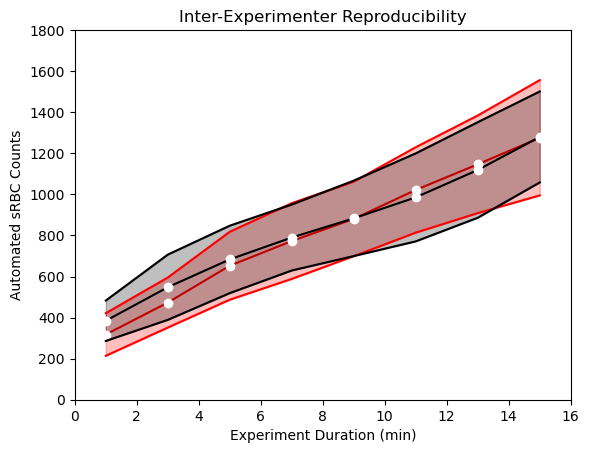

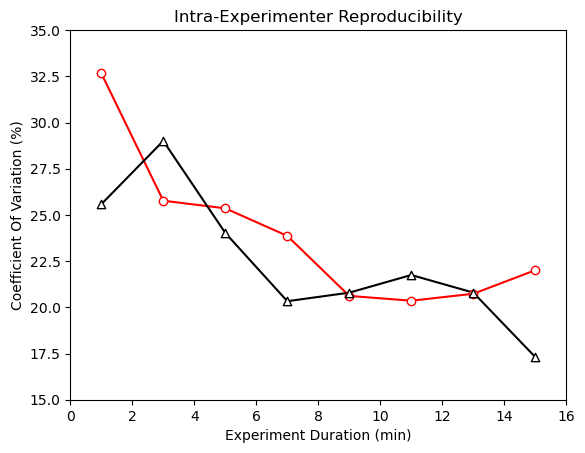

In [3]:
base_Directory = ""

reproducibility_Counts = pd.read_csv(base_Directory + "Analysis/Reproducibility_Counts/Counts.csv")

times = reproducibility_Counts["Time"].values
experimenter_One_Data = pd.DataFrame(np.zeros((int((len(reproducibility_Counts.columns) - 1)/2),len(times),)), columns =times) 
experimenter_Two_Data = pd.DataFrame(np.zeros((int((len(reproducibility_Counts.columns) - 1)/2),len(times),)), columns =times)
number_Of_Experiments = int((len(reproducibility_Counts.columns) - 1)/2)
for i in range(number_Of_Experiments):
    experimenter_One_Data.iloc[i] = reproducibility_Counts[str(i + 1)]
    experimenter_Two_Data.iloc[i] = reproducibility_Counts[str(i + 1 + number_Of_Experiments)]
experimenter_One_Means = []
experimenter_One_Errors = []
experimenter_Two_Means = []
experimenter_Two_Errors = []
for time in times:
    experimenter_One_Means.append(np.mean(experimenter_One_Data[time]))
    experimenter_One_Errors.append(np.std(experimenter_One_Data[time], ddof = 1))
    experimenter_Two_Means.append(np.mean(experimenter_Two_Data[time]))
    experimenter_Two_Errors.append(np.std(experimenter_Two_Data[time], ddof = 1))
    
experimenter_One_CVs = np.asarray(experimenter_One_Errors)/np.asarray(experimenter_One_Means)
experimenter_Two_CVs = np.asarray(experimenter_Two_Errors)/np.asarray(experimenter_Two_Means)
plt.figure()
upper_Bounds = np.asarray(experimenter_One_Means) + np.asarray(experimenter_One_Errors)
lower_Bounds = np.asarray(experimenter_One_Means) - np.asarray(experimenter_One_Errors)
plt.plot(times,upper_Bounds, color = "red")
plt.plot(times,lower_Bounds, color = "red")
plt.fill_between(times,upper_Bounds,lower_Bounds, color = "red", alpha = 0.25)
plt.scatter(times,experimenter_One_Means, color = "white", zorder = 2)
plt.plot(times,experimenter_One_Means, color = "red", zorder = 1)

upper_Bounds = np.asarray(experimenter_Two_Means) + np.asarray(experimenter_Two_Errors)
lower_Bounds = np.asarray(experimenter_Two_Means) - np.asarray(experimenter_Two_Errors)
plt.fill_between(times,upper_Bounds,lower_Bounds, color = "black", alpha = 0.25)
plt.plot(times,upper_Bounds, color = "black")
plt.plot(times,lower_Bounds, color = "black")
plt.scatter(times,experimenter_Two_Means, color = "white", zorder = 2)
plt.plot(times,experimenter_Two_Means, color = "black", zorder = 1)

plt.ylim(0,1800)
plt.xlim(0,16)
plt.title("Inter-Experimenter Reproducibility")
plt.ylabel("Automated sRBC Counts")
plt.xlabel("Experiment Duration (min)")
plt.savefig(base_Directory + "Analysis/Outputs/inter_Reproducibility_Plot.png")
plt.show()

plt.figure()
plt.plot(times,experimenter_One_CVs*100, color = "red", zorder = 1)
plt.plot(times,experimenter_Two_CVs*100, color = "black", zorder = 1)
plt.scatter(times,experimenter_One_CVs*100, edgecolor = "red", facecolor = "white", zorder = 2)
plt.scatter(times,experimenter_Two_CVs*100, color = "black", facecolor = "white",zorder = 2, marker = "^")
plt.ylim(15,35)
plt.xlim(0,16)
plt.title("Intra-Experimenter Reproducibility")
plt.ylabel("Coefficient Of Variation (%)")
plt.xlabel("Experiment Duration (min)")
plt.savefig(base_Directory + "Analysis/Outputs/intra_Reproducibility_Plot.png")
plt.show()